# Networks / graphs !

Die Standardbibliothek in Python zum Umgang mit Graphen ist `networkx`.

Dazu gibt es eine umfangreiche Dokumentation https://networkx.org/documentation/stable/reference/index.html

Darüber hinaus wird auch ein NetworkX Tuturial auf der Seite bereitgestellt:
https://networkx.org/documentation/stable/tutorial.html

Zum installieren: `pip install networkx`, bzw. `!pip install networkx` aus dem Jupyter notebook.

In [1]:
import networkx as nx
nx.__version__

'3.2.1'

In [2]:
#falls die Version < 2.6 ist: !pip install --upgrade networkx

In [3]:
import pandas as pd
from matplotlib import pyplot as plt

## Graph-Objekt erzeugen

Das geht einfach mit `G = nx.Graph()` (undirected).
Für ein directed Graph wäre es `nx.DiGraph()`... aber dazu kommen wir später.

In [4]:
G = nx.Graph()

In [5]:
G

### Knoten hinzufügen

#### Aufgaben:
- einzeln mit `.add_node(...)` einen Knoten `"Erik"` zum Graphen hinzufügen.

- eine Liste mit 5 weiteren Knoten mit `.add_nodes_from(["Sally", ...])` hinzufügen. Weitere Namen können selbst ausgedacht werden ...

### Kanten hinzufügen
- einzeln mit `.add_edge("Erik", "Sally")` eine Kante zwischen Erik und Sally hinzufügen 
- eine Liste mit mindestens 5 weiteren Kanten mit `.add_edges_from([...])` zum Graphen hinzufügen

### Graph darstellen

Eine einfache Darstellung (basierend auf Matplotlib) geht über `nx.draw(G)`.
Wichtige Parameter zur Einstellung sind 
- `with_labels=True`
- `node_color`
- `node_size`

### Aufgabe:
- Stellt den Graphen dar.

## Eigenschaften des Netzwerkes erfragen

- mit `.degree()` können wir die Degrees der Knoten erfragen.
- mit `G.neighbors(my_node)` können wir die Nachbarknoten des Knoten `my_node` erfragen. (Achtung: das gibt einen Iterator zurück, muss also z.B. über einen for-loop oder `list()` ausgelesen werden!)
- Die "Dichte" eines Graphen ist definiert als $d = \frac{2L}{N(N-1)}$ mit $L$ der Zahl der Kanten und $N$ der Zahl der Knoten. 
- Kürzste Route: `nx.shortest_path(G, source=, target=)` 
- Um die "Wichtigkeit" von Knoten (oder Kanten) zu beurteilen können Centrality-Messungen genutzt werden. In der Vorlesung hatten wir die closeness-centrality (`nx.closeness_centrality()`) und die betweenness-centrality (`nx.betweenness_centrality()`).  


## Aufgaben:
Beantworte mit den oben genannten Methoden/Funktionen die folgenden Fragen:
- Welcher Knoten hat den höchsten Degree?
- Was sind die Nachbarknoten von "Sally"?
- Welche Dichte hat das Netzwerk?
- Welcher Knoten hat die höchste closeness centrality?

# Not all graphs are connected...

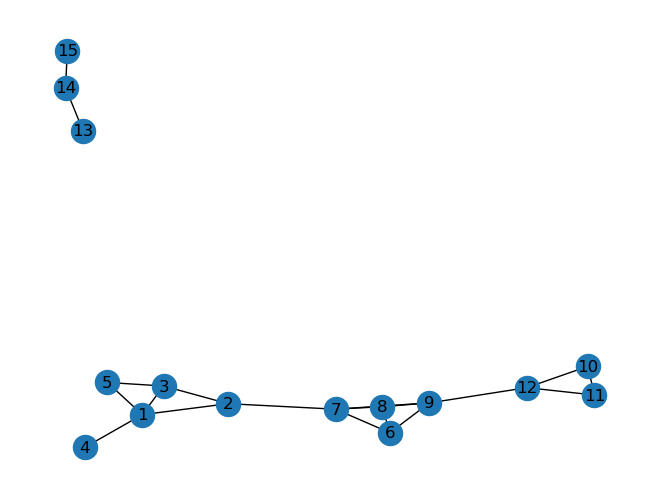

In [6]:
G = nx.Graph()
G.add_edges_from([[1,2], [2,3], [1,3], [1,4], [1,5], [3,5],
                  [6,7], [7,8], [8,9], [6,9], [6,8], [7,9],
                  [10,11], [11,12], [10,12], [9,12], [2,7],
                  [13, 14], [14, 15]])
nx.draw(G, with_labels=True)

## Aufgabe
- Erfrage mit `nx.is_connected()` ob der Graph zusammenhängend ist oder nicht.
- Was ist der kürzeste Weg von 4 zu 6, und was der kürzeste von 5 zu 15 ? (`nx.shortest_path(G, , )`)

---

## Directed graphs (gerichtete Graphen)
Mit `nx.DiGraph()` erzeugen wir Objekte für gerichtete Graphen.

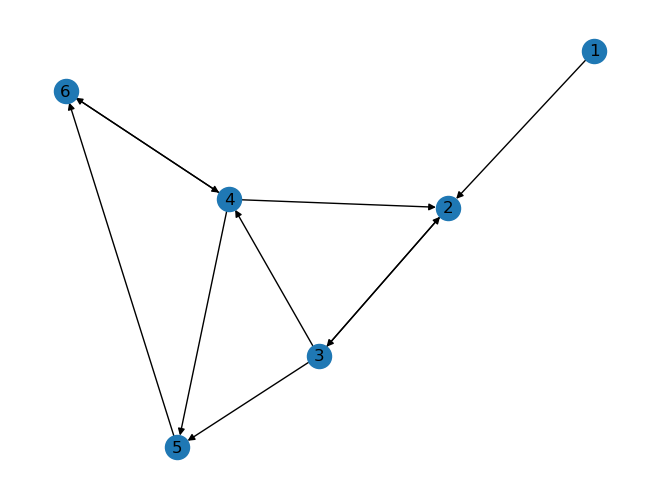

In [7]:
D = nx.DiGraph()
D.add_edges_from([
    (1,2), (2,3),
    (3,2), (3,4),
    (3,5), (4,2),
    (4,5), (4,6),
    (5,6), (6,4),
])
nx.draw(D, with_labels=True)

### Leicht abgewandelte Darstellung

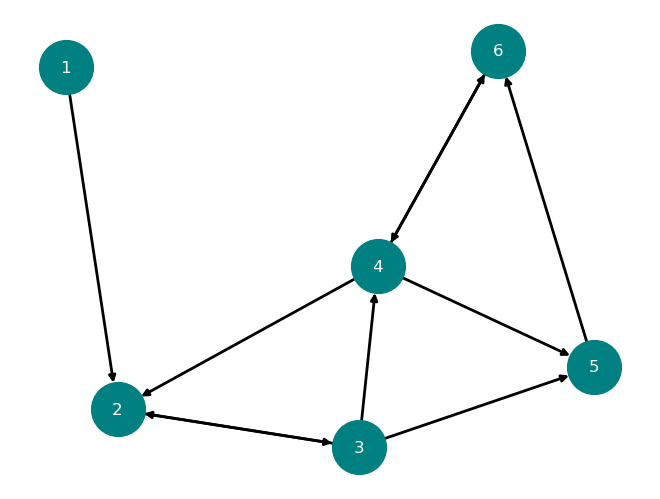

In [8]:
nx.draw(D, with_labels=True,
       node_color='teal',
       node_size=1500,
       font_color='white',
       width=2)

---
# Jetzt zu echten Daten!

## Import network data

Hier schauen wir uns Flugverbindungen in den USA an `openflights_usa.graphml`

Graphml-Dateien können wir mit `nx.read_graphml(filename)` importieren.

## Aufgabe:
- Wie viele Knoten und Kanten hat der Graph (`.number_of_nodes()`, `.number_of_edges()`) ?

## Attribute

Die Knoten (auch die Kanten) eines Netzwerks können Attribute haben, d.h. Feature die ihnen zugeordnet sind. In Networkx sehen wir dies z.B. wenn wir einzelne Knoten betrachten, etwa mit `G.nodes[0]`...

In [9]:
# Der folgende Code gibt die Attribute für den Knoten "IND" aus:
G.nodes["IND"]

KeyError: 'IND'

In [ ]:
# Teste was der folgende Code macht:
for node in G.nodes:
    print(G.nodes[node]["name"])

## Aufgabe:

Beantworte mittels `networkx` die folgende Frage:

Gibt es einen direkten Flug zwischen Indianapolis (IND) and Fairbanks, Alaska (FAI)? (Direkter Flug heißt keine Zwischenstopps)

## Aufgabe:

Beantworte mittels `networkx` die folgende Frage:

Wenn ich von Indianapolis (IND) nach Fairbanks, Alaska (FAI) fliegen will, welche Route hätte die wenigsten Stops?

## Aufgabe:

Beantworte mittels `networkx` die folgende Frage:

Kann ich von jedem Flughafen in den USA zu jedem anderen Flughafen in den USA über Flugverindungen gelangen? In anderen Worte: Gibt es eine Flugroute zwischen allen möglichen Paaren von Flughäfen in den USA?

---

## Ausblick: Node importance
Um die "Wichtigkeit" von Knoten (oder Kanten) zu beurteilen können Centrality-Messungen genutzt werden. In der Vorlesung hatten wir die closeness-centrality (`nx.closeness_centrality()`) und die betweenness-centrality (`nx.betweenness_centrality()`).  

## Aufgabe:
Welche 5 Flughäfen in den USA haben die höchste betweenness centrality?

Und, Bonusfrage: Warum ausgerechnet dieser Flughafen? Wo liegt er und warum scheint dieser so wichtig zu sein?